# Lezione 5

## Dario Pullia

L'**algoritmo di Metropolis** è un metodo di campionamento applicabile ad **ogni** distribuzione per **ogni** numero N di dimensioni.

Data una distribuzione da campionare $p(\vec x)$ dove $\vec x$ è un vettore multidimensionale e una probabilità di transizione $T(\vec x| \vec y)$ , l'algorimo funziona come segue:
1. Si sceglie un punto di partenza
2. Si estrae casualmente il passo successivo. 
3. Il passo viene eseguito con probabilità $A=min[1, \frac{T(y|x)p(x)}{T(x|y)p(y)}]$
4. Ripetere dal punto 2.

La scelta della probabilità di transizione T è importante in termini di efficienza del processo. Nel nostro caso scegliamo distribuzioni simmetriche in cui T(x|y)=T(y|x).


Applichiamo l'algoritmo di Metropolis per trovare il valor medio di alcune funzioni d'onda radiali dell'atomo di idrogeno.

Le funzioni degli stati 1s e 2p sono rispettivamente: 
$$\Psi_{1,0,0}(r,\theta,\phi)=\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0}$$
$$\Psi_{2,1,0}(r,\theta,\phi)=\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)$$



Valutiamo due possibili funzioni T(y|x):
- Passo uniforme: $\vec x_{i} \Rightarrow  \vec x_{i+1} \in [\vec x_{i} - \vec a, \vec x_{i} + \vec a ]$
- Passo gaussiano: $\vec x_{i} \Rightarrow \vec x_{i+1} = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x_{i+1} - x_{i})^2}{2\sigma^2}}$

Sottolineo che, in quanto catena di Markov, il punto i+1 **dipende solo** dalla posizione i.
La lunghezza del passo è data rispettivamente da $\vec a$ e $\sigma$, la cui scelta è fondamentale per l'efficienza del processo. Un passo ridotto comporta una esplorazione lenta di tutto lo spazio, mentre un passo lungo significa uscire troppo velocemente dai punti significativi della distribuzione. Il passo è stato scelto in modo che il **rapporto $\frac{N_{acc}}{N_{tot}}\sim 0.5$**.

#### Implementazione
La classe Metropolis contiene al suo interno le informazioni sulla posizione del punto e dei contatori per tener traccia dell'*acceptance rate*.
I suoi metodi principali permettono di compiere passi (gaussiani ed uniformi) seguendo le probabilità date da $|\Psi_{1,0,0}|^2$ e $|\Psi_{2,1,0}|^2$, estrarre la posizione del punto e la sua distanza da $\vec 0$.

Vengono fatti M=10000000 passi divisi in N=100 blocchi.


#### Equilibrazione

Un parametro importante per l'algoritmo di M. è la posizione del punto all'**inizio della catena**. Per dimostrarne gli effetti, il punto è stato posizionato inizialmente a (100,0,0).

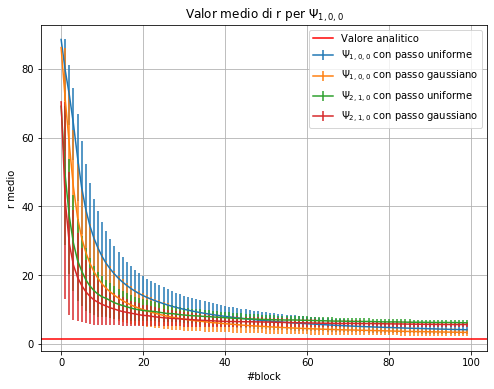

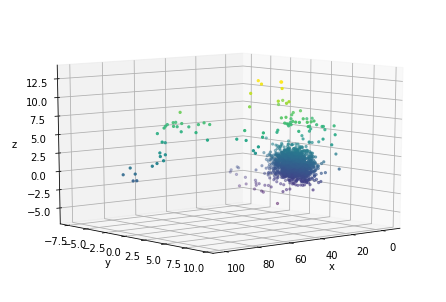

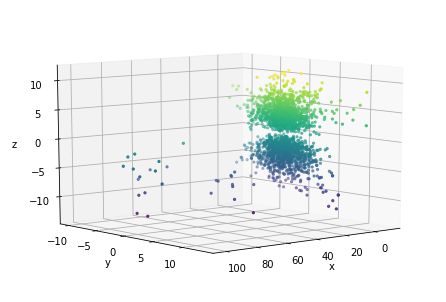

In [59]:
unif100, Errorunif100,gauss100, Errorgauss100,unif210, Errorunif210,gauss210, Errorgauss210,  = np.loadtxt("data01/data01_noneq.dat", usecols=(0,1,2,3,4,5,6,7), delimiter=' ', unpack='true')
x = np.arange(N) 
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,unif100, yerr=Errorunif100, label="$\Psi_{1,0,0}$ con passo uniforme")
plt.errorbar(x,gauss100, yerr=Errorgauss100,label="$\Psi_{1,0,0}$ con passo gaussiano")
plt.errorbar(x,unif210, yerr=Errorunif210, label="$\Psi_{2,1,0}$ con passo uniforme")
plt.errorbar(x,gauss210, yerr=Errorgauss210,label="$\Psi_{2,1,0}$ con passo gaussiano")

plt.title('Valor medio di r per $\Psi_{1,0,0}$')
plt.xlabel('#block')
plt.ylabel('r medio')
plt.axhline(y = 3/2, color = 'r', linestyle = '-',label="Valore analitico")
plt.grid(True)
plt.legend()
plt.show()




X,Y,Z= np.loadtxt("data01/data01_3d_noneq.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 50)
plt.show()
X,Y,Z= np.loadtxt("data01/data01_3d_noneq.dat", usecols=(3,4,5), delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 50)
plt.show()

Il valor medio di *r* evidenzia la mancata equilibrazione. È interessante notare la rapidità con cui il punto raggiunge una posizione ragionevole, tanto che per la generazione di queste immagini si è usato M=10000 passi (contro M=10000000 della simulazione reale) poichè valori maggiori nascondono eccessivamente l'effetto.
Nel grafico 3D si può osservare lo spostamento del punto dalla posizione iniziale alla regione per noi interessante.

Di seguito la posizione iniziale scelta è (3,0,0) per entrambe le funzioni d'onda.

### Esercizio 05.1

Studiamo il valor medio di r nel caso $\Psi_{1,0,0}$:

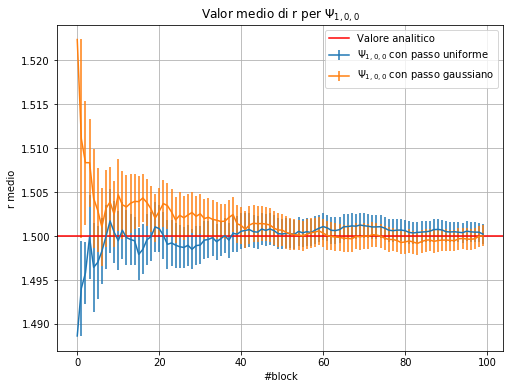

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

def AutoC(t, vec):
    appo1=0
    appo2=0
    appo3=0
    appo4=0
    appo5=0
    tmax=0
    tmax=vec.size
    for i in range(tmax-t):
        appo1+=vec[i]*vec[i+t]
        appo2+=vec[i]
        appo3+=vec[i+t]
    for i in range(tmax):
        appo4+=vec[i]*vec[i]
        appo5+=vec[i]
        
    return (appo1/(tmax-t) - appo2*appo3/((tmax-t)*(tmax-t)))/((appo4/tmax)-(appo5/tmax)**2)    






N=100
unif100, Errorunif100,gauss100, Errorgauss100,unif210, Errorunif210,gauss210, Errorgauss210,  = np.loadtxt("data01/data01.dat", usecols=(0,1,2,3,4,5,6,7), delimiter=' ', unpack='true')
x = np.arange(N) 
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,unif100, yerr=Errorunif100, label="$\Psi_{1,0,0}$ con passo uniforme")
plt.errorbar(x,gauss100, yerr=Errorgauss100,label="$\Psi_{1,0,0}$ con passo gaussiano")

plt.title('Valor medio di r per $\Psi_{1,0,0}$')
plt.xlabel('#block')
plt.ylabel('r medio')
plt.axhline(y = 3/2, color = 'r', linestyle = '-',label="Valore analitico")
plt.grid(True)
plt.legend()
plt.show()



Consideriamo ora il caso $\Psi_{2,1,0}$:

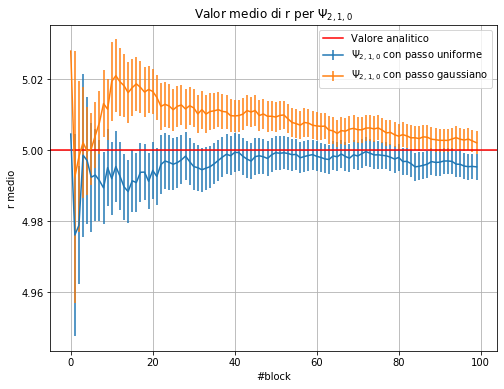

In [54]:
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,unif210, yerr=Errorunif210, label="$\Psi_{2,1,0}$ con passo uniforme")
plt.errorbar(x,gauss210, yerr=Errorgauss210,label="$\Psi_{2,1,0}$ con passo gaussiano")

plt.title('Valor medio di r per $\Psi_{2,1,0}$')
plt.xlabel('#block')
plt.ylabel('r medio')
plt.axhline(y = 5, color = 'r', linestyle = '-',label="Valore analitico")
plt.grid(True)
plt.legend()
plt.show()


I risultati ottenuti sono compatibili con i valori analitici.



#### Autocorrelazione


L'algoritmo di Metropolis per la sua natura Markoviana dimostra autocorrelazione, poichè il passo i+1 dipende direttamente dal passo i.

Il problema si assorbe facendo data blocking con blocchi sufficientemente grandi, questo 'dà il tempo' al punto di allontanarsi dalla posizione originale. Per capire la dimensione minima dei blocchi affinchè questi risultino tra loro scorrelati, si è plottata l'autocorrelazione tra il punto e sè stesso dopo n passi.

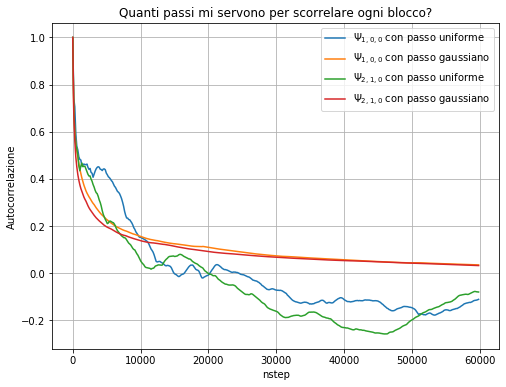

In [71]:
x = np.arange(400) 


Pos100U, Pos100G, Pos210U, Pos210G  = np.loadtxt("data01/data01_AutoC.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')
fig=plt.figure(figsize=(8, 6))

U100=[]
G100=[]
U210=[]
G210=[]

for i in range(400):
    
    U100.append(AutoC(150*i, Pos100U))
    G100.append(AutoC(150*i, Pos100G))
    U210.append(AutoC(150*i, Pos210U))
    G210.append(AutoC(150*i, Pos210G))



plt.plot(150*x,U100, label="$\Psi_{1,0,0}$ con passo uniforme")
plt.plot(150*x,G100,label="$\Psi_{1,0,0}$ con passo gaussiano")
plt.plot(150*x,U210, label="$\Psi_{2,1,0}$ con passo uniforme")
plt.plot(150*x,G210, label="$\Psi_{2,1,0}$ con passo gaussiano")

plt.xlabel('nstep')
plt.ylabel('Autocorrelazione')
plt.title('Quanti passi mi servono per scorrelare ogni blocco?')
plt.grid(True)
plt.legend()
plt.show()




Da questo grafico si deduce che ogni blocco dev'essere necessariamente di dimensione L>40000 per non incappare in problemi di autocorrelazione.

Nei casi di passo gaussiano si osserva una forte regolarità nell'andamento dell'autocorrelazione che non si osserva nel caso di passo uniforme.

#### Visualizzazione grafica

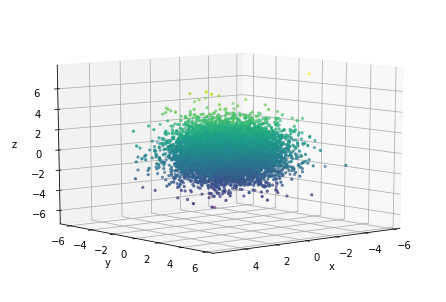

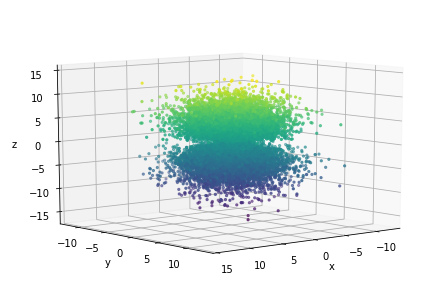

In [56]:
X,Y,Z= np.loadtxt("data01/data01_3d.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 50)
plt.show()
X,Y,Z= np.loadtxt("data01/data01_3d.dat", usecols=(3,4,5), delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 50)
plt.show()

Le immagini sono state generate estraendo ogni 400 passi la posizione del punto. Si osserva la forma attesa degli orbitali 1s e 2p.